# Get Mag Evolution Model

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import esutil

In [2]:
import h5py
import glob

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [113]:
def get_bins(xbins,x):
    indices = []
    xmed    = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],zbins[1:]):
        w, = np.where((x>=xl)&(x<=xh))
        indices.append(w)
    return indices, xmed

In [114]:
def get_percentile(x,y,xbins,alpha=10):
    keys, xmed = get_bins(xbins,x)
    xmean = np.array([np.median(y[ix]) for ix in keys])
    xup = np.array([np.percentile(y[ix],100-alpha) for ix in keys])
    xlo = np.array([np.percentile(y[ix],alpha) for ix in keys])
    return xmed, xmean, xup, xlo

## BCG Mag Cut

In [188]:
# root = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/tiles/'
# files= glob.glob(root+'buzzard_*')

In [189]:
root = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/truthSample/amagLimited/input/'
files= glob.glob(root+'buzzard_*')

In [190]:
data = []
for i in range(5):
    df = pd.read_hdf(files[i],key='members')
    data.append(df)

In [191]:
df = data[0]
for d in data[1:]:
    df.append(d)

In [192]:
df.head()

,HALOID,magerr_z_des,Mag_true_i_des_z01,magerr_g_des,magerr_i_des,healpix_pixel,RHALO,mag_g_lsst,mag_z_lsst,redshift,halo_mass,mag_r_lsst,mag_i_lsst,is_central,RA,galaxy_id,Mag_true_r_des_z01,DEC,magerr_r_des,hpx8
0,9953688,0.0,-23.727180,0.0,0.0,0,0.0,16.084212,14.528009,0.110043,4.730000e+14,15.191672,14.805468,True,46.786490,0.0,-23.346755,6.931661,0.0,0
1,9954351,0.0,-22.906305,0.0,0.0,0,0.0,16.848106,15.289413,0.108139,1.428571e+14,15.959947,15.568585,True,47.829098,12.0,-22.519937,6.778624,0.0,0
2,12672281,0.0,-22.530425,0.0,0.0,0,0.0,18.469998,17.185888,0.195613,7.118571e+13,17.708848,17.328874,True,41.298925,21.0,-22.196587,4.492031,0.0,0
3,12975204,0.0,-22.622738,0.0,0.0,0,0.0,18.697277,17.430800,0.222442,1.020429e+14,17.939910,17.539099,True,45.796549,27.0,-22.263644,5.230871,0.0,0
4,12671919,0.0,-21.986590,0.0,0.0,0,0.0,18.513812,16.870900,0.140944,1.116571e+14,17.546612,17.138702,True,43.353770,32.0,-21.607555,4.549465,0.0,0


In [330]:
root = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/halos/'
fname = root+'buzzard_y3_v2.0.0_golden_halos.fits'

cat = Table(getdata(fname))

In [690]:
out = 'buzzrd_Mi_21.0.txt'
mag_vec = np.genfromtxt(out,delimiter=',')

In [691]:
out = 'buzzrd_mi_bcg.txt'
mag_vec_bcg = np.genfromtxt(out,delimiter=',')

In [692]:
mag_bcg_max = interp1d(mag_vec_bcg[:,0],mag_vec_bcg[:,1],fill_value='extrapolate')
mag_max     = interp1d(mag_vec[:,0],mag_vec[:,1],fill_value='extrapolate')

mag_lim     = interp1d(cat['redshift'],cat['magLim'],fill_value='extrapolate')

In [693]:
mag_max(0.7)

array(23.46412)

In [694]:
z_min, z_max = 0.07,0.7

In [695]:
mag_bcg_max(0.1)-mag_max(0.1)

-2.0879999999999974

Text(0.5,1,'mag evolution: Buzzard v2.0')

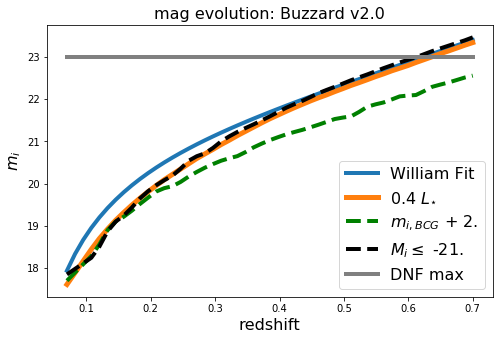

In [717]:
zvec = np.linspace(z_min,z_max,51)

plt.figure(figsize=(8,5))
#plt.plot(zvec,mag_max(zvec)+1.,'b--',lw=3,label=r'$M_{i}\leq$ -20.')
plt.plot(zvec,char_luminosity(zvec)+1.75,lw=4,label='William Fit')

plt.plot(zvec,mag_lim(zvec),lw=5,label=r'0.4 $L_{\star}$')
plt.plot(zvec,mag_bcg_max(zvec)+2.089,'g--',lw=4,label=r'$m_{i,BCG}$ + 2.')
plt.plot(zvec,mag_max(zvec),'k--',lw=4,label=r'$M_{i}\leq$ -21.')
plt.plot([z_min,z_max],[23.,23.],lw=4,color='gray',label='DNF max')

plt.legend(fontsize=16.)
plt.xlabel('redshift',fontsize=16)
plt.ylabel('$m_i$',fontsize=16)
plt.title('mag evolution: Buzzard v2.0',fontsize=16.)


In [667]:
## (Black) Wiliam's fit
def char_luminosity(z,m0=21.25,slope_log=2.128,slope=8.30):
    return m0+slope_log*np.log(z)+slope*z

In [675]:
Z1 = [ 2.85703803, 23.35451485]
Z2 = [ -0.13290108,   1.11453393,  -3.74351207,   6.96351527, -10.04310863,  12.60755443,  -7.85820367,   0.92175766]
def char_luminosity(z):
    return np.poly1d(Z1)(np.log(z)) + np.poly1d(Z2)(z)

## BCG Mag Cut

In [196]:
root = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/truthSample/amagLimited/input/'
files= glob.glob(root+'buzzard_*')

In [197]:
files[0]

'/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/truthSample/amagLimited/input/buzzard_v2.0.0_00000.hdf5'

In [198]:
data = []
for i in range(9):
    df = pd.read_hdf(files[i],key='members')
    data.append(df)

In [199]:
df = data[0]
for d in data[1:]:
    df.append(d)

In [200]:
centrals = np.array(df['is_central'][:])

In [201]:
ar = np.array(df['Mag_true_i_des_z01'][centrals])+5*np.log10(0.7)
mr = np.array(df['mag_i_lsst'][centrals])
ztr= np.array(df['redshift'][centrals])

In [202]:
z_min, z_max = 0.075, 1.05
w, = np.where((ztr<=z_max)&(ztr>=z_min))

In [203]:
w

array([   0,    1,    2, ..., 7525, 7526, 7527])

In [204]:
#zbins = np.percentile(ztr[w],np.linspace(0,100,31))
dx = 0.025
zbins = np.arange(z_min,z_max+dx/2,dx)

keys, xmed = get_bins(zbins,ztr[w])

In [205]:
zmed, mr_mean, mr_up, mr_lo = get_percentile(ztr[w],mr[w],zbins,alpha=18)

(0.0, 1.05)

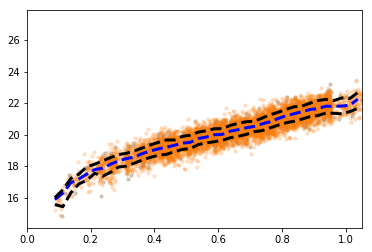

In [206]:
plt.scatter(ztr[::10],mr[::10],s=10,alpha=0.2)
plt.scatter(ztr[w],mr[w],s=10,alpha=0.2)
plt.plot(zmed,mr_mean,'b--',lw=3)
plt.plot(zmed,mr_up,'k--',lw=3)
plt.plot(zmed,mr_lo,'k--',lw=3)

plt.xlim(0.,z_max)

In [207]:
mag_bcg_max = interp1d(zmed,mr_mean,fill_value='extrapolate')

In [208]:
out = 'buzzrd_mi_bcg.txt'

f = open(out,'w')
f.write('##buzzard v2.0 truth table central galaxies selected\n')
f.write('##atention: the mi is the lsst i-band\n')
f.write('##z,mi\n')
for zi, mi in zip(zmed,mr_mean):
    f.write('%.3f, %.3f\n'%(zi,mi))
f.close()

In [210]:
mr_mean + 3.6

array([19.47189231, 19.87260783, 20.53981001, 20.76983671, 21.08735968,
       21.37327857, 21.46375333, 21.71836875, 21.91759105, 22.07511845,
       22.17498816, 22.39675397, 22.5587475 , 22.69060322, 22.7937053 ,
       22.91810437, 23.05180138, 23.10666882, 23.34772342, 23.43847774,
       23.58452086, 23.60980811, 23.81069488, 23.90792621, 24.02465659,
       24.1150734 , 24.27680369, 24.41244904, 24.61078404, 24.79227921,
       24.91945477, 25.05034944, 25.18873606, 25.24444658, 25.40019792,
       25.38476229, 25.41137696, 25.45767668, 25.84547677])

## Get Absolute Mag Cut

In [469]:
root = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/truthSample/amagLimited/input/'
files= glob.glob(root+'buzzard_*')

In [470]:
files[0]

'/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/truthSample/amagLimited/input/buzzard_v2.0.0_00000.hdf5'

In [471]:
data = []
for i in range(15):
    df = pd.read_hdf(files[i],key='members')
    data.append(df)

In [472]:
df = data[0]
for d in data[1:]:
    df.append(d)

In [473]:
ar = np.array(df['Mag_true_i_des_z01'][:])+5*np.log10(0.7)
mr = np.array(df['mag_i_lsst'][:])
ztr= np.array(df['redshift'][:])

In [612]:
z_min, z_max = 0.075, 1.05

dm = 0.02
amag_cut = -21.
w, = np.where((ar<=amag_cut+dm)&(ar>=amag_cut-dm)&(ztr<=z_max)&(ztr>=z_min))

In [613]:
#zbins = np.percentile(ztr[w],np.linspace(0,100,31))
dx = 0.025
zbins = np.arange(z_min,z_max+dx/2,dx)

keys, xmed = get_bins(zbins,ztr[w])

In [614]:
zmed, mr_mean, mr_up, mr_lo = get_percentile(ztr[w],mr[w],zbins,alpha=10)

(0.0, 1.05)

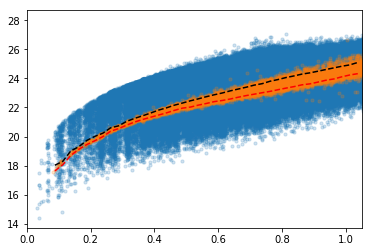

In [615]:
plt.scatter(ztr[::10],mr[::10],s=10,alpha=0.2)
plt.scatter(ztr[w],mr[w],s=10,alpha=0.2)
plt.plot(zmed,mr_up,'k--')
plt.plot(zmed,mr_lo,'r--')

plt.xlim(0.,z_max)

In [616]:
from scipy.interpolate import interp1d

In [617]:
mag_max = interp1d(zmed,mr_up,fill_value='extrapolate')

In [618]:
mr_95 = mag_max(ztr)
cut,  = np.where((mr<=mr_95)&(ztr>z_min)&(ztr<z_max))

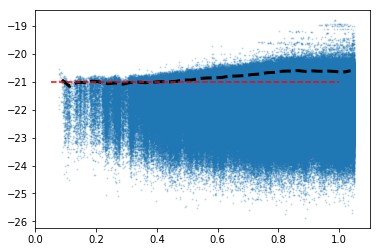

In [619]:
#plt.scatter(ztr[::10],ar[::10],s=10,alpha=0.2)
zmed, ar_mean,ar_up, ar_lo = get_percentile(ztr[cut],ar[cut],zbins,alpha=10.)
plt.scatter(ztr[cut],ar[cut],s=1,alpha=0.2)
plt.plot(zmed,ar_up,'k--',lw=3)
plt.plot([0.05,1.],[amag_cut,amag_cut],'r--')

In [620]:
def get_fraction(z,mag,amag,zbins):
    keys, xmed = get_bins(zbins,z)
    mr_max = mag_max(z)
    fraction = np.array([1.*np.count_nonzero(mag[ix]<=mr_max[ix])/ix.size for ix in keys])
    return xmed, fraction

In [621]:
cut2,  = np.where((ar<=amag_cut)&(ztr>z_min)&(ztr<z_max))

_, frac= get_fraction(ztr[cut2],mr[cut2],ar[cut2],zbins)

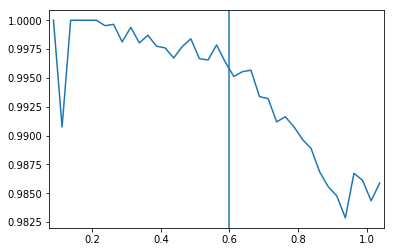

In [622]:
plt.plot(xmed,frac)
plt.xlim(z_min,z_max)
plt.axvline(0.6)

In [623]:
mag_max(0.6)

array(22.93742266)

#### The selection is complete within 0.5% but not pure.

In [624]:
mr_up

array([18.02538655, 18.29598635, 19.01018195, 19.29794015, 19.72907569,
       20.01078917, 20.22390976, 20.60157492, 20.73668304, 21.04355859,
       21.25053558, 21.42644223, 21.61461751, 21.81802845, 21.97479844,
       22.15984343, 22.30450401, 22.45999573, 22.59534157, 22.7432171 ,
       22.87585909, 22.99898623, 23.14443854, 23.26989389, 23.39524215,
       23.53937843, 23.63946018, 23.80717553, 23.92475247, 24.06266859,
       24.17289641, 24.2996726 , 24.38442211, 24.49698589, 24.61408575,
       24.72663547, 24.8403157 , 24.93266318, 25.10043225])

In [625]:
xmed

array([0.0875, 0.1125, 0.1375, 0.1625, 0.1875, 0.2125, 0.2375, 0.2625,
       0.2875, 0.3125, 0.3375, 0.3625, 0.3875, 0.4125, 0.4375, 0.4625,
       0.4875, 0.5125, 0.5375, 0.5625, 0.5875, 0.6125, 0.6375, 0.6625,
       0.6875, 0.7125, 0.7375, 0.7625, 0.7875, 0.8125, 0.8375, 0.8625,
       0.8875, 0.9125, 0.9375, 0.9625, 0.9875, 1.0125, 1.0375])

In [626]:
out = 'buzzrd_Mi_%.1f.txt'%(np.abs(amag_cut))

f = open(out,'w')
f.write('##buzzard v2.0 truth table, galaxies within Mi<=-19.5 selected\n')
f.write('##atention: the mi is the lsst i-band\n')
f.write('##z,mi\n')
for zi, mi in zip(xmed,mr_up):
    f.write('%.3f, %.3f\n'%(zi,mi))
f.close()

In [259]:
out = 'buzzrd_Mi_19.5.txt'
mag_vec = np.genfromtxt(out,delimiter=',')

In [87]:
# hf = h5py.File(files[0],'r')
# ar = hf['members/main/Mr'][:]#+5*np.log10(0.7)
# mag= hf['members/main/mag'][:]
# ztr= hf['members/main/z_true'][:]
# zcls=hf['members/main/redshift'][:]
# hf.close()

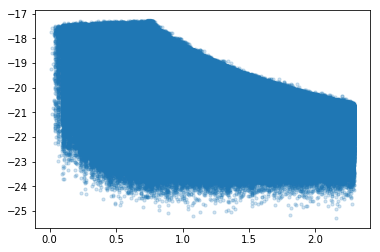

In [91]:
plt.scatter(ztr,ar,s=10,alpha=0.2)
#plt.axvline(1.,color='k',ls='--')
#plt.axhline(-19.,color='k',ls='--')

In [59]:
zmin, zmax = 0.5,0.8
ar_min = -19.

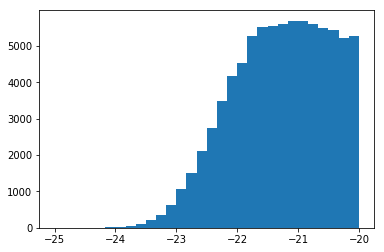

In [60]:
cut, = np.where((zcls>=zmin)&(zcls<=zmax))
_    = plt.hist(ar[cut],bins=np.linspace(-25.,-20.,31))
#plt.yscale('log')